<a href="https://colab.research.google.com/github/Martin-Msb/context-aware-recommendation/blob/main/context_aware_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This research notebook is part of DAMI II course at DSV

### Authors: © 2022 Martin Masaba & Edda Waciira

Install Kaggle library

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive

In [5]:
#Mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle

In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
customers_df = pd.read_csv(r"C:\Users\AdminPC\Edda Stuff\Edda Data Scientist\Python Projects\datasets\customers.csv")

In [ ]:
customers_df.head(15)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,NaN,NaN,ACTIVE,NONE,20.0,fe7b8e2b3fafb89ca90db17ffeeae0fd29b795d803f749...
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,NaN,ACTIVE,NONE,20.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
customers_df.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [ ]:
member_status = pd.DataFrame(customers_df['club_member_status'].value_counts()/customers_df['club_member_status'].shape[0] * 100)
member_status

,club_member_status
ACTIVE,92.748509
PRE-CREATE,6.775609
LEFT CLUB,0.034038


'pre-create' and 'left-club' seems to be very small groups, so we can drop the rows

In [ ]:
customers_df.drop(customers_df.index[customers_df['club_member_status'] != 'ACTIVE'], inplace=True)

customers_df.club_member_status.value_counts()

ACTIVE    1272491
Name: club_member_status, dtype: int64

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272491 entries, 0 to 1371978
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1272491 non-null  object 
 1   FN                      470826 non-null   float64
 2   Active                  458452 non-null   float64
 3   club_member_status      1272491 non-null  object 
 4   fashion_news_frequency  1260566 non-null  object 
 5   age                     1266255 non-null  float64
 6   postal_code             1272491 non-null  object 
dtypes: float64(3), object(4)
memory usage: 77.7+ MB


In [ ]:
fashion_news = pd.DataFrame(customers_df['fashion_news_frequency'].value_counts()/customers_df['fashion_news_frequency'].shape[0] * 100)
fashion_news

,fashion_news_frequency
NONE,61.963660
Regularly,37.037904
Monthly,0.061140
None,0.000157


'Monthly' and 'None' rows are few so we can drop them

In [ ]:
customers_df.drop(customers_df.index[customers_df['fashion_news_frequency'] == 'None'], inplace=True)
customers_df.drop(customers_df.index[customers_df['fashion_news_frequency'] == 'Monthly'], inplace=True)
customers_df.fashion_news_frequency.value_counts()

NONE         788482
Regularly    471304
Name: fashion_news_frequency, dtype: int64

In [ ]:
customers_df.fashion_news_frequency.unique()

array(['NONE', 'Regularly', nan], dtype=object)

In [ ]:
avg_age = customers_df.age.mean()
max_age = customers_df.age.max()
min_age = customers_df.age.min()

print('The average age is {}, the max age is {} and the min age is {}'
      .format(avg_age, max_age, min_age))


The average age is 36.075925580572054, the max age is 99.0 and the min age is 16.0


<AxesSubplot:title={'center':'Customers Ages'}, xlabel='Age Bins', ylabel='Count'>

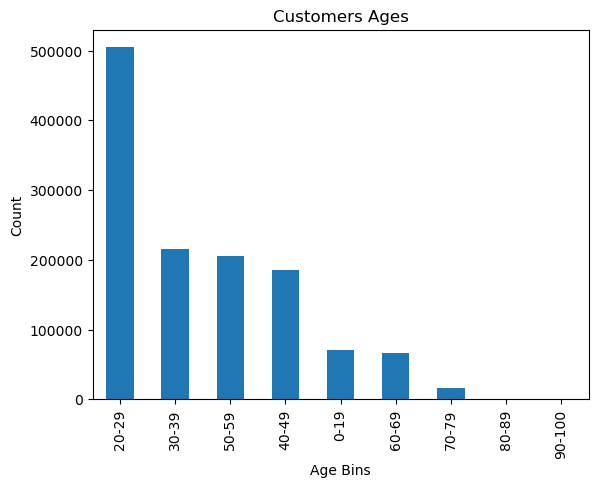

In [ ]:
bins = 0, 19, 29, 39, 49, 59, 69, 79,89,100
customers_df['age_bins'] = pd.cut(customers_df.age, bins, labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])


customers_df.age_bins.value_counts().plot(kind = 'bar', title = 'Customers Ages', xlabel = 'Age Bins', ylabel= 'Count')


In [ ]:
#Should drop some ages here
age_bins = pd.DataFrame(customers_df['age_bins'].value_counts()/customers_df['age_bins'].shape[0] * 100)
age_bins

,age_bins
20-29,39.669469
30-39,16.915321
50-59,16.201794
40-49,14.594354
0-19,5.525705
60-69,5.229333
70-79,1.267033
80-89,0.100180
90-100,0.006527


In [ ]:
customers_df = customers_df.drop(customers_df[(customers_df['age'] >= 50) | (customers_df['age'] <= 20)].index)

In [ ]:
customers_df.age_bins.value_counts()

20-29     450858
30-39     215114
40-49     185598
0-19           0
50-59          0
60-69          0
70-79          0
80-89          0
90-100         0
Name: age_bins, dtype: int64

In [ ]:
#drop unnecessary columns
customers_df.drop(['age_bins', 'postal_code'], axis = 1, inplace =True)
customers_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,1.0,1.0,ACTIVE,Regularly,32.0
10,0000945f66de1a11d9447609b8b41b1bc987ba185a5496...,NaN,NaN,ACTIVE,NONE,29.0
...,...,...,...,...,...,...
1371973,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,1.0,1.0,ACTIVE,Regularly,22.0
1371974,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,1.0,1.0,ACTIVE,Regularly,21.0
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0


In [ ]:
#Should drop FN & Active?
customers_df.describe()

,FN,Active,age
count,302323.0,293971.0,851570.000000
mean,1.0,1.0,31.339367
std,0.0,0.0,8.538533
min,1.0,1.0,21.000000
25%,1.0,1.0,24.000000
50%,1.0,1.0,29.000000
75%,1.0,1.0,37.000000
max,1.0,1.0,49.000000


In [ ]:
#Transaction Train
#Models to evaluate
#image data